First we import the packages needed. Thats just several of them, the rest package is wrote in below code.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [100]:
df = pd.read_csv('./housing.csv')

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [101]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [103]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

From the data above, we have 207 null data in total_bedroom. For normalize that we can fill that empty with the mean value.

In [104]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_33804\1590527289.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


We check is there empty data or not. If not we continue to the next step.

We scatter the data with 'x' and 'y' value refere to position data. We separate the value of the houses with colors. We can see the map of California here.


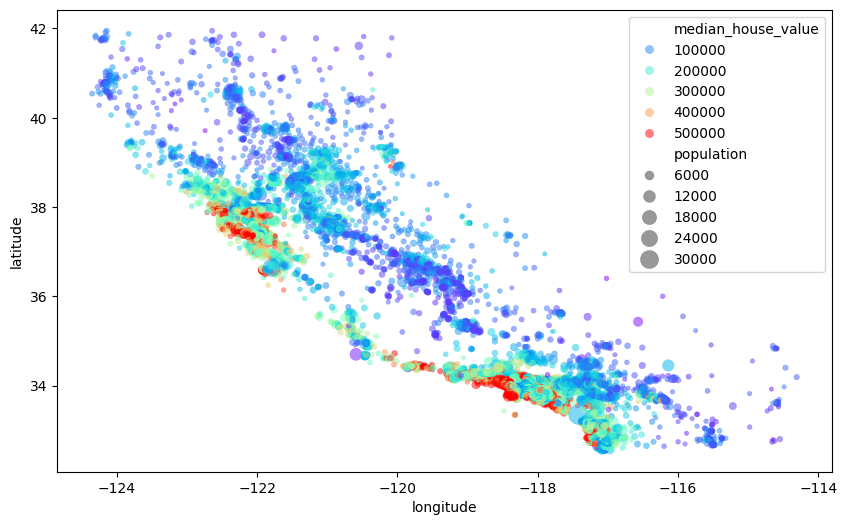

In [105]:
plt.figure(figsize=(10,6))

scatter = sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    hue='median_house_value',
    size='population',
    sizes=(10, 200),  # Adjust min/max size of points
    palette='rainbow',
    alpha=0.5,
    edgecolor=None,
    legend='brief'
)

For giving the quantity visualization, we do hist the variables with their quantity.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

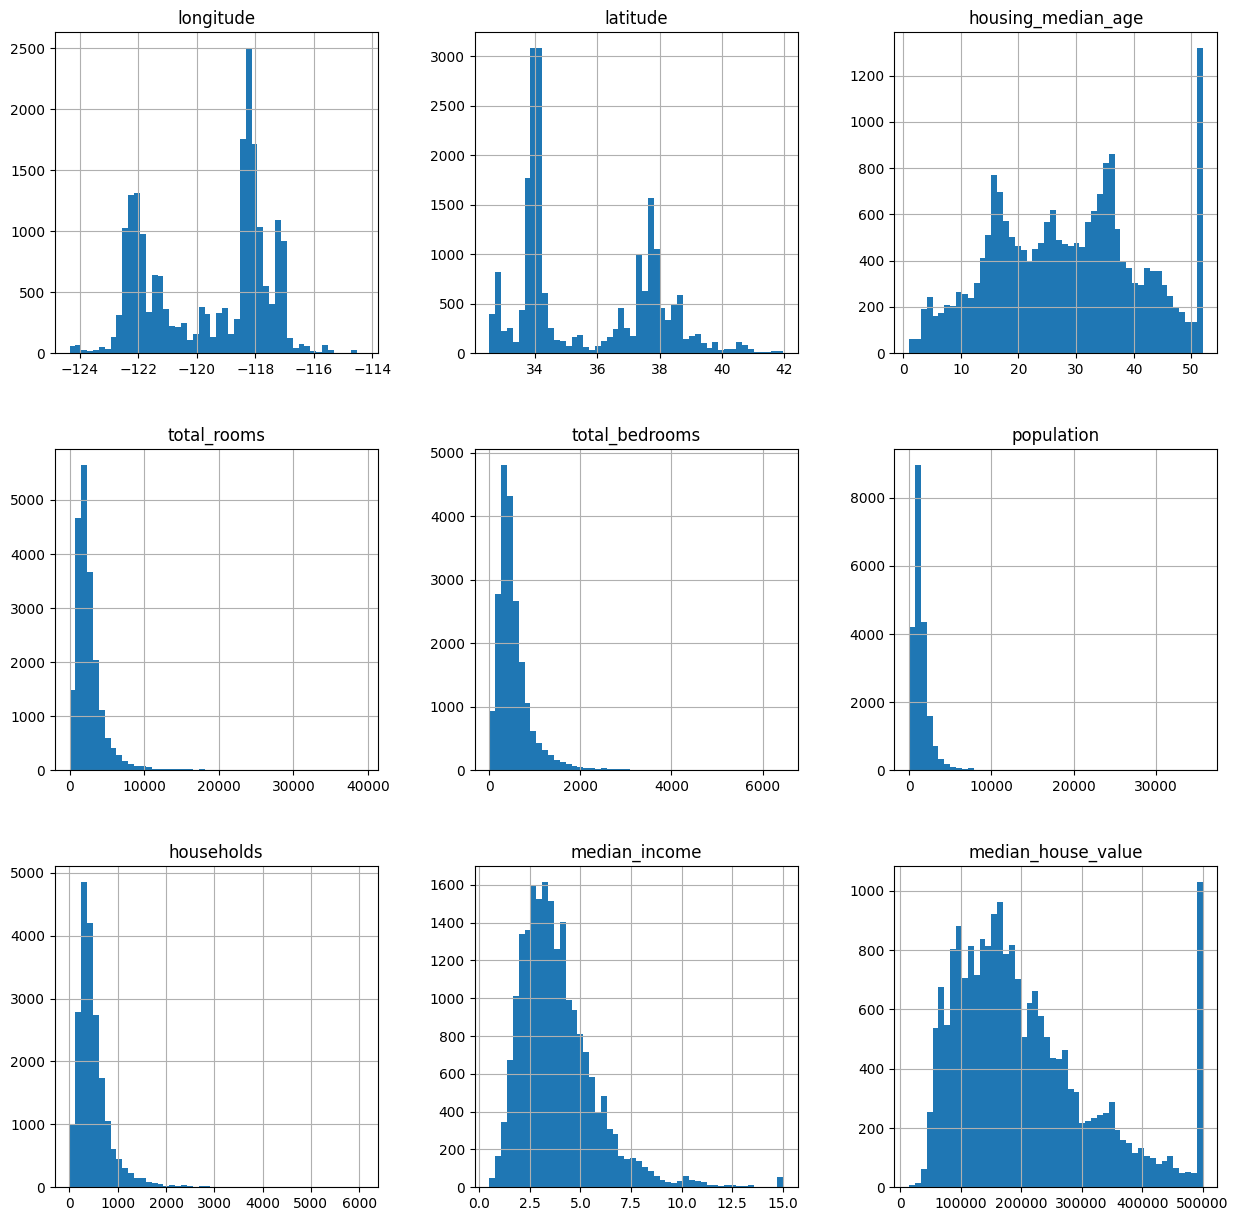

In [106]:
df.hist(bins=50, figsize=(15,15))

In [107]:
# Fill missing values in 'total_bedrooms' with the median of the column
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

# Convert categorical variable 'ocean_proximity' to numerical using one-hot encoding
# df = pd.get_dummies(df, columns=['ocean_proximity'])
df.drop(columns=['ocean_proximity'], inplace=True)

df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

df = df.drop(columns=['total_rooms', 'total_bedrooms'])

C:\Users\HP\AppData\Local\Temp\ipykernel_33804\2160147765.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


We do heatmap to see the correlation between the variables more easily.

<Axes: >

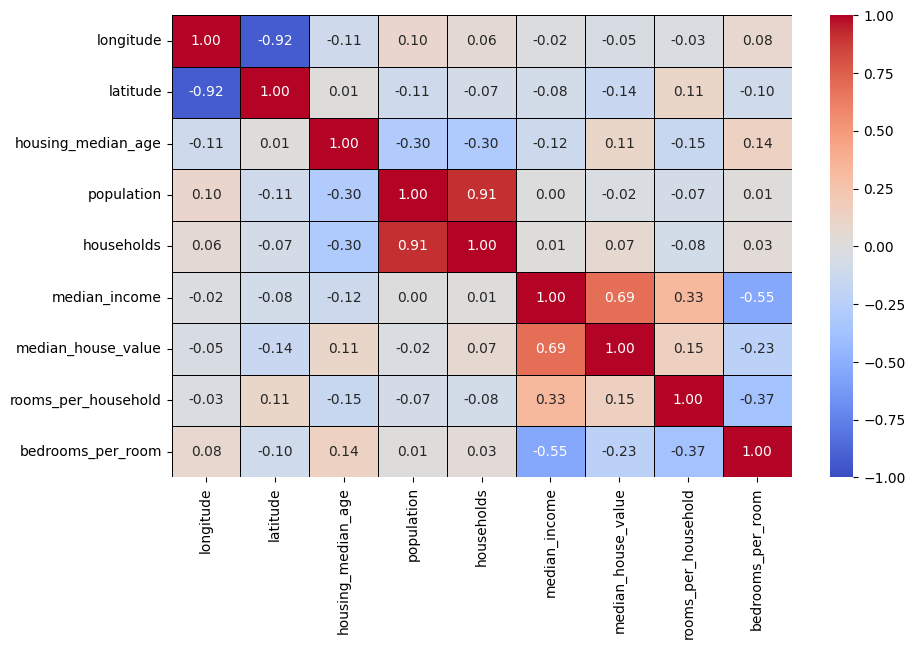

In [108]:
plt.figure(figsize=(10,6))

sns.heatmap(df.corr(), 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f', 
            linewidths=0.5, 
            linecolor='black',
            vmin=-1,vmax=1)

In [109]:
# Split the dataset into features and target variable
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [110]:
print(X.dtypes)


longitude              float64
latitude               float64
housing_median_age     float64
population             float64
households             float64
median_income          float64
rooms_per_household    float64
bedrooms_per_room      float64
dtype: object


In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif.sort_values(by="VIF", ascending=False))


               feature         VIF
0            longitude  711.020141
1             latitude  567.965855
7    bedrooms_per_room   18.555175
4           households   15.672259
3           population   14.920020
5        median_income    8.154074
2   housing_median_age    7.235552
6  rooms_per_household    7.131880


In [112]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [113]:
# Scale the features using RobustScaler
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

In [114]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [115]:
# Show coefficients
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coeff_df.sort_values(by="Coefficient", ascending=False))

               Feature    Coefficient
5        median_income   89574.950246
4           households   42315.970166
2   housing_median_age   22349.250270
7    bedrooms_per_room   14796.378899
6  rooms_per_household    5487.785155
3           population  -36909.414420
1             latitude -160346.369934
0            longitude -160528.961637


Finally, we print the important value, such as the R^2 score and RMSE (Root Mean Squared Error).

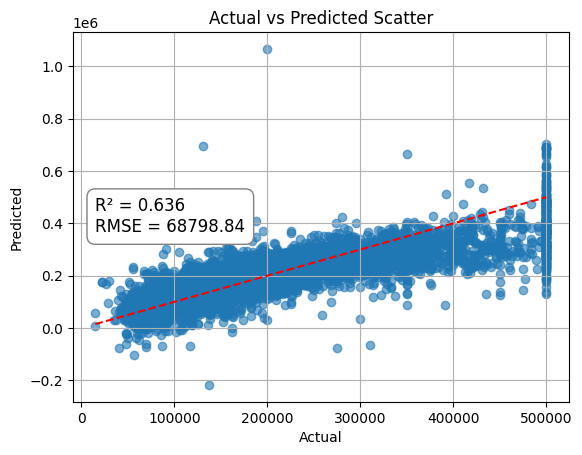

In [116]:
from sklearn.metrics import mean_squared_error, r2_score,mean_squared_error

# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Scatter")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line

plt.text(
    x=y_test.min(), 
    y=y_test.max(), 
    s=f"R² = {r2:.3f}\nRMSE = {rmse:.2f}", 
    fontsize=12, 
    verticalalignment='top', 
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)

plt.show()


- The training score is to determine R-square value (how fit the model into actual train data)
- The testing score is to determine R-square value (how fit the model into actual test data)
- RMSE displays the Root Mean Squared Error, providing an easy-to-interpret metric of prediction accuracy (lower values indicate better model performance).To put in context we add the relative RMSE which is evaluating the RMSE is bettr or not. If the relative_rmse is <10% we can assume that the RMSE is good, but ours is 36% :D.

As summary, our prediction using linear regression is good because we gained the training and testing score almost perfect.